**Install and Import Libraries**

In [53]:
!pip install pandas
!pip install opencv-python

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import ast
%matplotlib inline

**Path to csv and images to plot the images**

In [55]:
PATH = 'D:/Pictures/dataset/new_images/cells.csv'
IMG_ROOT = 'D:/Pictures/dataset/new_images/'

In [56]:
data = pd.read_csv(PATH, delimiter=',')
data.head()

,Unnamed: 0,img_name,class,bbox
0,0,BloodImage_00322.jpg,Platelets,"['168', '374', '198', '406']"
1,1,BloodImage_00322.jpg,Platelets,"['527', '244', '564', '282']"
2,2,BloodImage_00322.jpg,Platelets,"['565', '383', '602', '421']"
3,3,BloodImage_00322.jpg,WBC,"['307', '174', '528', '387']"
4,4,BloodImage_00377.jpg,RBC,"['448', '244', '566', '350']"


**Plot of the images to check them**

In [57]:
# Get image as numpy array
def load_image(name, path):
    img_path = path + name
    img = cv2.imread(img_path)
    return img

# Plot numpy array
def plot_image(img):
    plt.imshow(img)
    plt.title(img.shape)
    
# Plot a grid of examples
def plot_grid(img_names, img_root, rows=5, cols=5):
    fig = plt.figure(figsize=(25,25))
    
    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, img_root)
        plot_image(img)
        
    plt.show()

In [58]:
# get unique filenames: filenames are repeated in the csv. We want 25 different pictures
filenames = list(set(data['img_name'].values.tolist()))

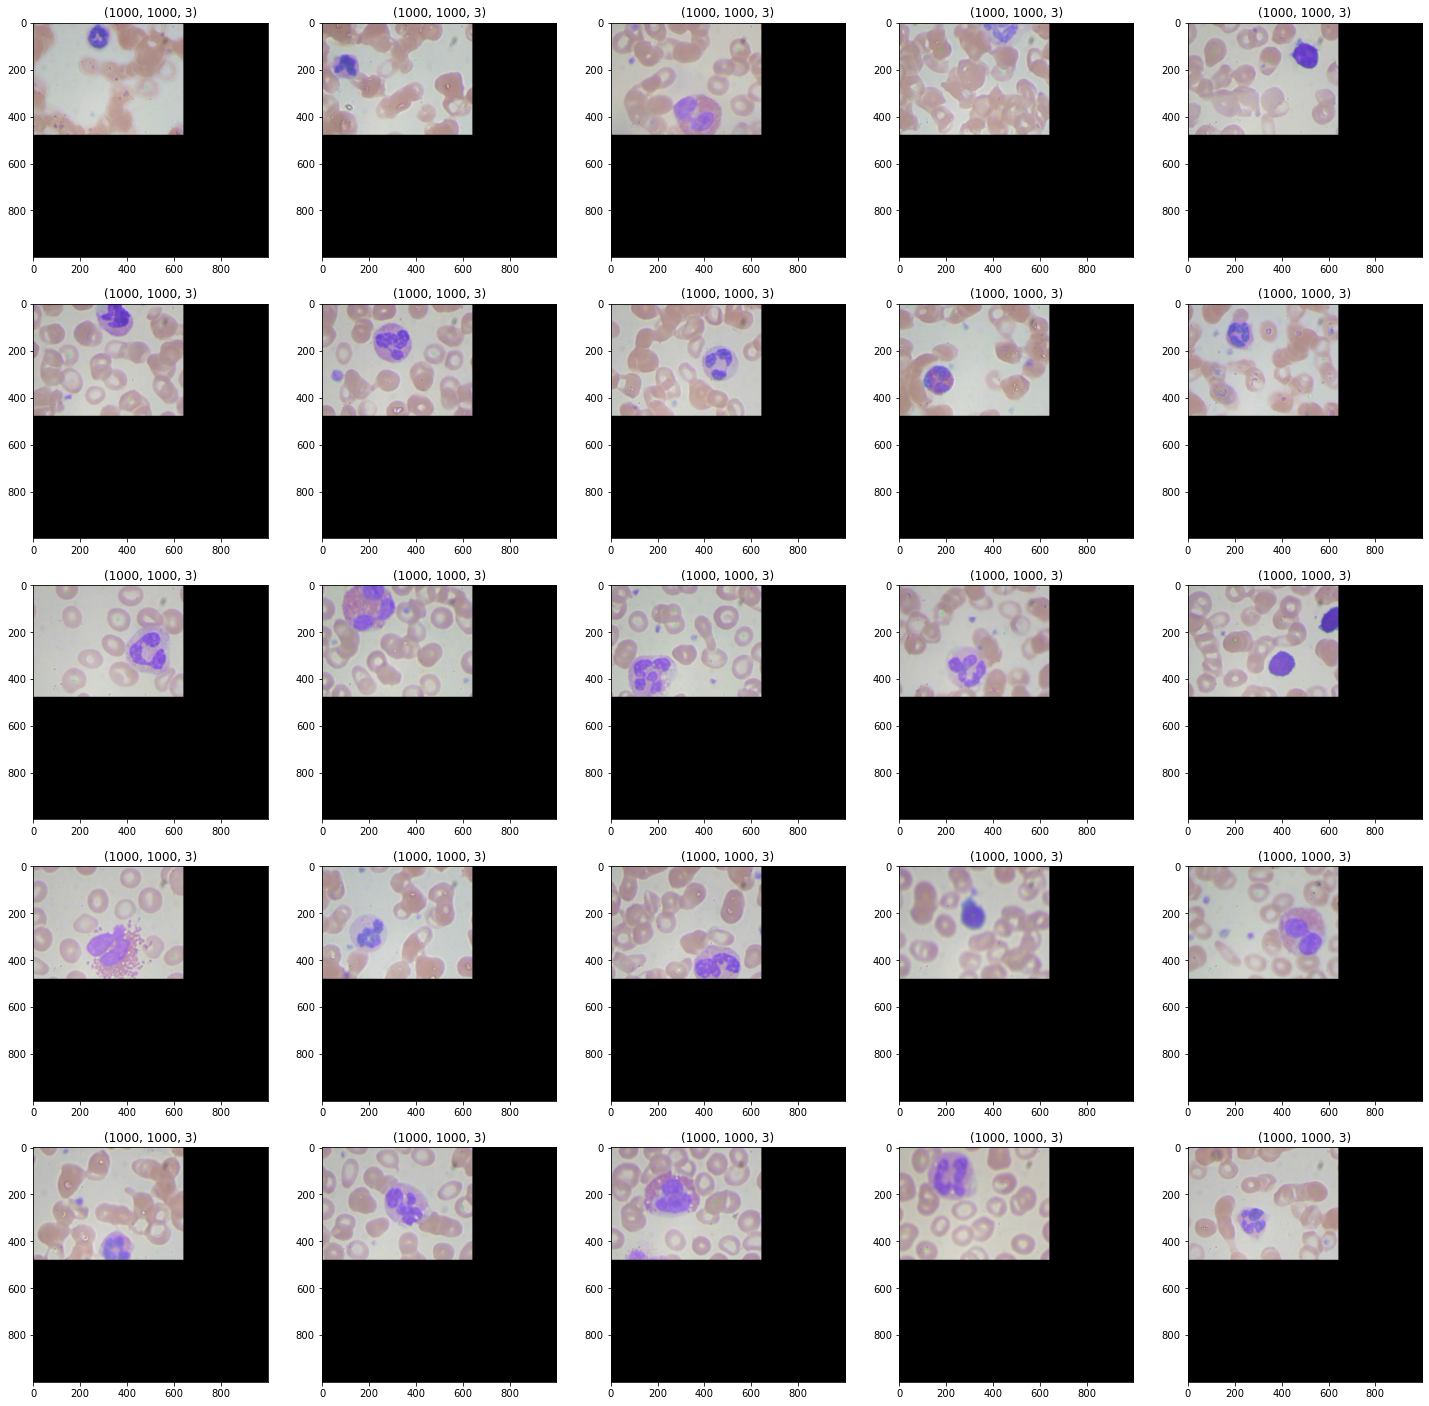

In [59]:
plot_grid(filenames[:25], IMG_ROOT)

**Plot Images with Bounding Boxes**

In [60]:
def class_to_color(class_id):
    colors = {'Platelets':(255,0,0),'WBC':(0,255,0),'RBC':(0,0,255)}
    return colors[class_id]

# draw a single bounding box onto a numpy array image
def draw_bounding_box(img, annotation):
    if annotation.isnull().values.any():
        return
    coord=ast.literal_eval(annotation['bbox'])
    x_min, y_min = int(coord[0]), int(coord[1])
    x_max, y_max = int(coord[2]), int(coord[3])
    
    class_id = annotation['class']
    color = class_to_color(class_id)
    
    cv2.rectangle(img,(x_min,y_min),(x_max,y_max), color, 2)

# draw all annotation bounding boxes on an image
def annotate_image(img, name, all_annotations):
    annotations = all_annotations[all_annotations['img_name'] == name]
    for index, row in annotations.iterrows():
        draw_bounding_box(img, row)

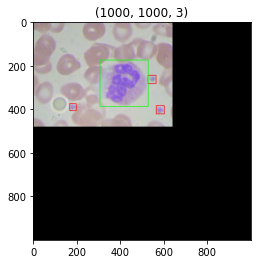

In [61]:
# Plot a single sample with all its bounding boxes
name = 'BloodImage_00322.jpg'
img = load_image(name, IMG_ROOT)
annotate_image(img, name, data)
plot_image(img)

**Plot grid with bounding boxes**

In [62]:
# Plot a grid of examples
def plot_grid_bbox(img_names, img_root, rows=5, cols=5):
    fig = plt.figure(figsize=(25,25))
    
    for i,name in enumerate(img_names):
        fig.add_subplot(rows,cols,i+1)
        img = load_image(name, IMG_ROOT)
        annotate_image(img, name, data)
        plot_image(img)
        
    plt.show()

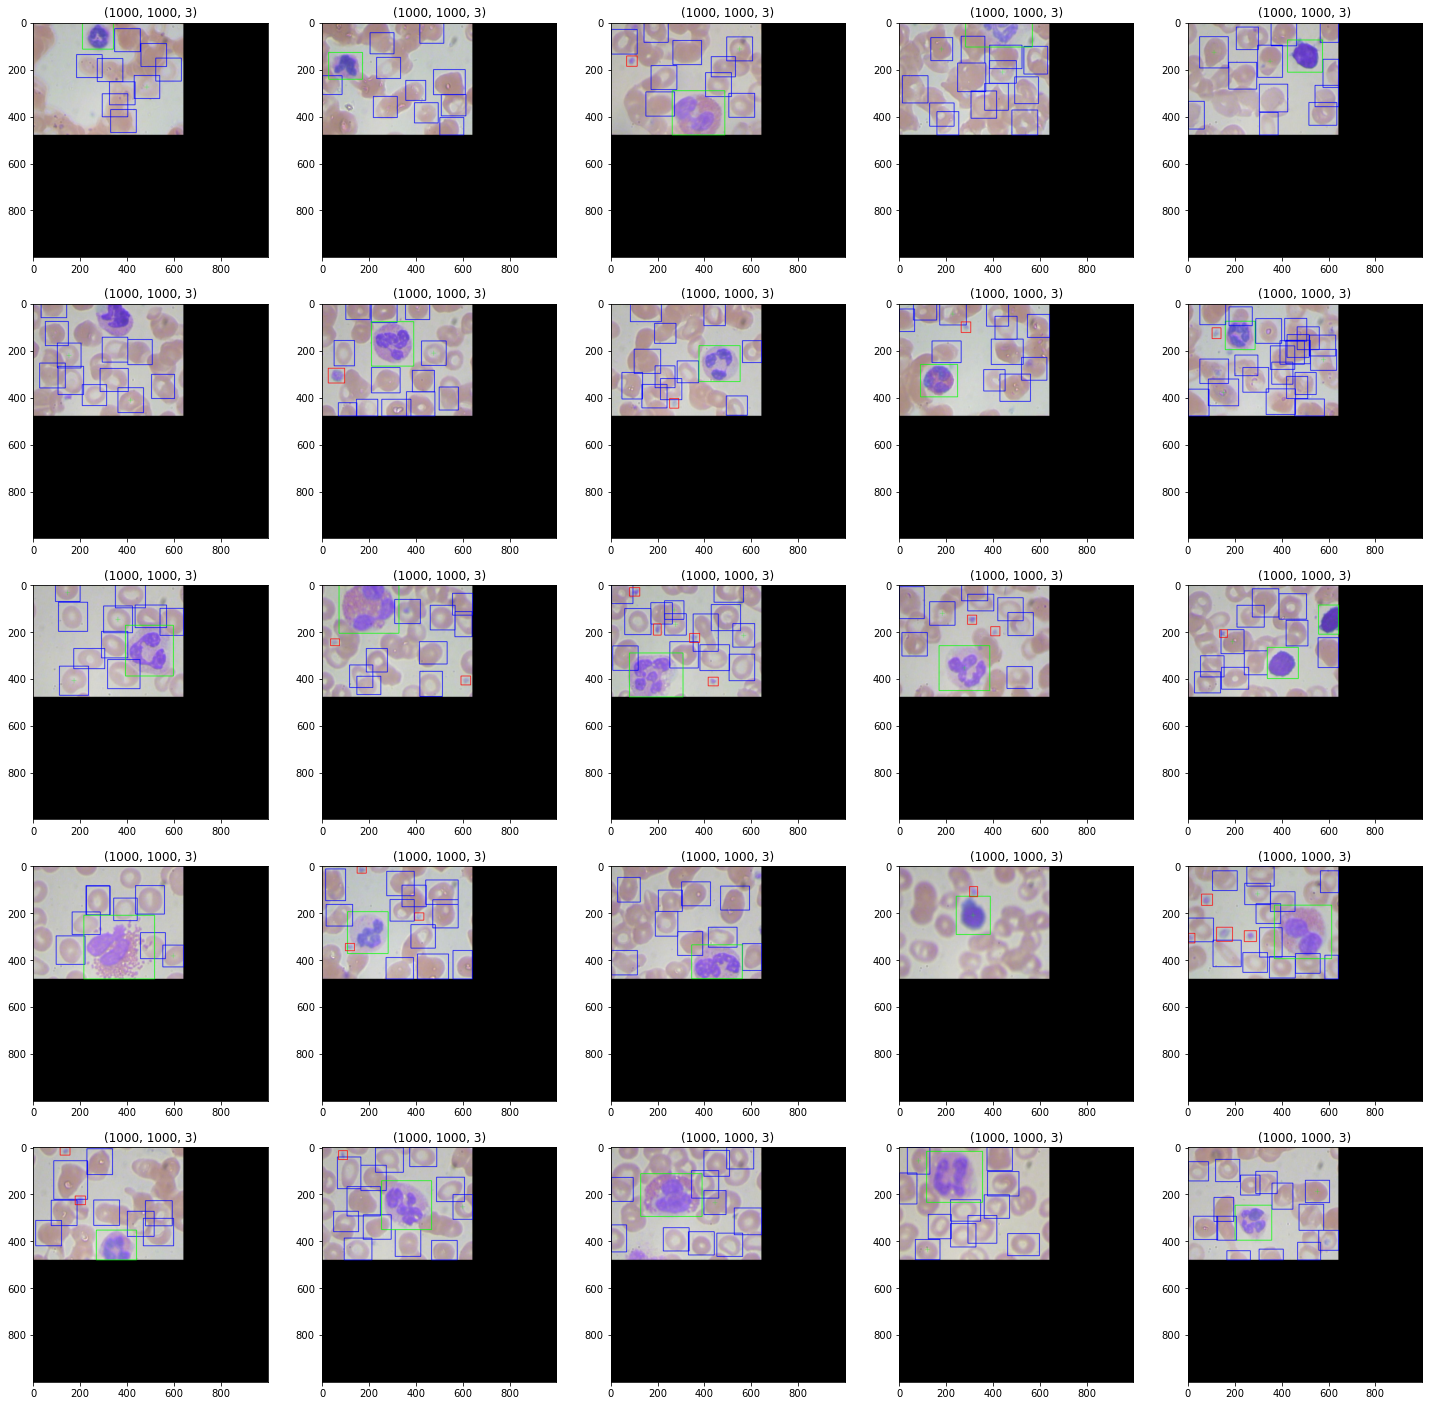

In [63]:
plot_grid_bbox(filenames[:25], IMG_ROOT)